In [9]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [10]:
import matplotlib.pyplot as plt
import numpy
import seaborn
import wordcloud

# Python Community Insights With Public Data

Using the the [PyPI public dataset](https://bigquery.cloud.google.com/dataset/the-psf:pypi) and the [StackOverflow public dataset](https://bigquery.cloud.google.com/dataset/bigquery-public-data:stackoverflow) what are some insights we can get about the Python community?

We'll be using Pandas and the Google Cloud client libraries.

In [11]:
from google.cloud import bigquery
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


## What versions of Python are being used to download packages?

Using the the [PyPI public dataset](https://bigquery.cloud.google.com/dataset/the-psf:pypi), get a count of how many downloads there have been for each Python version in January 2018 so far.

In [13]:
%%bigquery pypi_df

#standardSQL
SELECT
  REGEXP_EXTRACT(details.python, r"[0-9]+\.[0-9]+") AS python_version,
  COUNT(*) AS downloads
FROM `the-psf.pypi.downloads201801*`
WHERE details.installer.name = 'pip'
GROUP BY python_version
ORDER BY downloads DESC

,python_version,downloads
0,2.7,411798144
1,3.6,54006295
2,3.5,44528155
3,3.4,21657569
4,2.6,5051339
5,3.3,526609
6,3.7,412965
7,3.2,28598
8,None,17265
9,3.1,108


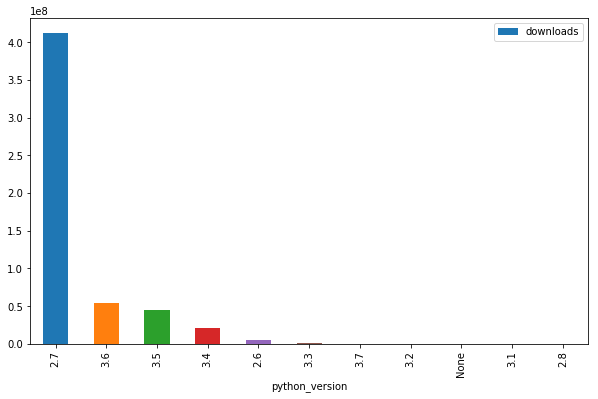

In [14]:
pypi_df.plot.bar('python_version', 'downloads')

We see that a significant portion of downloads are still using Python 2.7, but there is a visible portion using Python 3.x, with about half of those on Python 3.6.

## Is the portion using Python 3 changing?

In [15]:
%%bigquery p3_df

#standardSQL
SELECT
  PARSE_DATE("%Y%m%d", _TABLE_SUFFIX) AS date,
  100 * COUNTIF(REGEXP_EXTRACT(details.python, r"^([^\.]+)") = "3") / COUNT(*) AS percent_3,
  COUNT(*) AS downloads
FROM `the-psf.pypi.downloads*`
WHERE details.installer.name = 'pip'
GROUP BY date

,date,percent_3,downloads
0,2018-04-07,24.475415,22756227
1,2016-05-23,10.861780,10370077
2,2017-11-03,20.908104,20950058
3,2017-09-05,19.808825,23249021
4,2016-12-08,10.549424,5634469
5,2016-08-29,10.874622,12274532
6,2016-11-02,13.011430,15400529
7,2016-10-07,11.147584,13407910
8,2017-04-07,15.529293,20664238
9,2017-07-23,17.966220,14362008


In [16]:
# Convert to unix timestamp so we can plot.
# https://stackoverflow.com/a/8778548/101923

import datetime
from datetime import timezone

p3_df = p3_df.assign(
    date_num=p3_df['date'].apply(
        lambda d: datetime.datetime(
            d.year, d.month, d.day).replace(
            tzinfo=timezone.utc).timestamp()))

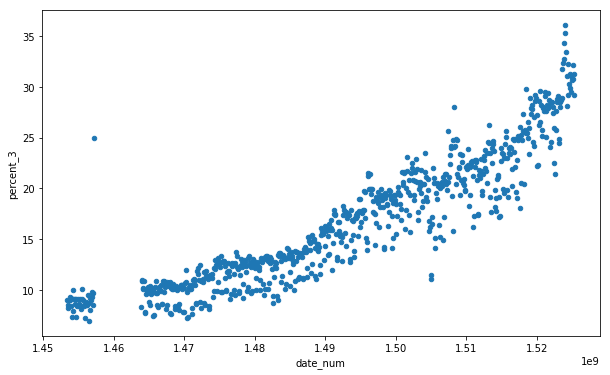

In [17]:
p3_df.plot.scatter('date_num', 'percent_3')

For a deeper exploration of this dataset and how you can use it to learn about your favorite package, check out [Paul Kehrer's blog post](https://langui.sh/2016/12/09/data-driven-decisions/) and the [pypinfo CLI tool](https://github.com/ofek/pypinfo).

## What questions do people ask about Python?

Using the [StackOverflow public dataset](https://bigquery.cloud.google.com/dataset/bigquery-public-data:stackoverflow), what are the most popular questions people have about Python?

In [18]:
%%bigquery so_df

#standardSQL
SELECT
  id, title, view_count
FROM `bigquery-public-data.stackoverflow.posts_questions`
WHERE tags like '%python%'
ORDER BY view_count DESC
LIMIT 100

,id,title,view_count
0,379906,How do I parse a string to a float or int in P...,2718409
1,82831,How to check whether a file exists?,2578982
2,3294889,Iterating over dictionaries using 'for' loops,2519636
3,423379,Using global variables in a function other tha...,2450657
4,3277503,How do I read a file line-by-line into a list?,2342884
5,89228,Calling an external command in Python,2341659
6,3437059,Does Python have a string 'contains' substring...,2255207
7,176918,Finding the index of an item given a list cont...,2234466
8,961632,Converting integer to string in Python?,2220431
9,1712227,How to get the number of elements in a list in...,2168230


The most popular question is about how to [parse a string to a float or integer](https://stackoverflow.com/questions/379906/parse-string-to-float-or-int). All of these questions are about working with Python itself and not any specific package. Some top topics include:

- built-in objects like strings and dictionaries
- time
- parsing

Let's build a word cloud to see what topics pop out.

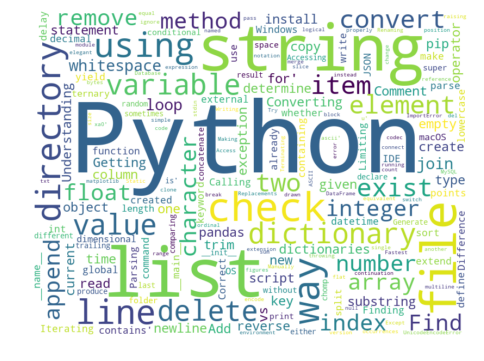

In [20]:
wc = wordcloud.WordCloud(
    width=800, height=600, background_color='white')
wc.generate(' '.join(so_df.title))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

## Are some packages harder to use?

The nice thing about BigQuery is that if you have access to several datasets, you can join them together. Even though the PyPI dataset is in `the-psf` project and the StackOverlow dataset is in the `bigquery-public-data` project, we can still join them together.

I'm interested to know which packages have more questions per download in 2017.

In [21]:
%%bigquery qpd_df

#standardSQL
SELECT
  project,
  SUM(questions) / downloads AS qpd,
  SUM(questions) AS total_questions,
  downloads
FROM (
  SELECT
    file.project AS project,
    COUNT(*) AS downloads
  FROM `the-psf.pypi.downloads2017*`
  WHERE details.installer.name = 'pip'
  GROUP BY project ) pypi
JOIN (
  SELECT
    tags,
    COUNT(*) AS questions
  FROM `bigquery-public-data.stackoverflow.posts_questions`
  WHERE tags LIKE '%python%'
  GROUP BY tags ) so
ON pypi.project IN UNNEST(SPLIT(so.tags, '|'))
WHERE pypi.downloads >= 10000
GROUP BY project, downloads
ORDER BY qpd DESC

,project,qpd,total_questions,downloads
0,list,2.375134e+00,31119,13102
1,opencv,2.996111e-01,9631,32145
2,heroku,2.347885e-01,2431,10354
3,django-rest-framework,2.172453e-01,4399,20249
4,sqlite,1.579747e-01,3953,25023
5,html,1.386573e-01,11593,83609
6,json,1.026449e-01,13851,134941
7,facebook,1.018545e-01,1417,13912
8,math,1.010355e-01,2849,28198
9,urllib2,9.564853e-02,2741,28657


Some of these, like the [list package](https://pypi.org/project/List/1.3.0/) do exist, but refer to built-in modules / types and were likely downloaded by mistake.

Others, like `opencv` and `boost` really are pretty complex packages, so I'm not too surprised that there are more questions about them.

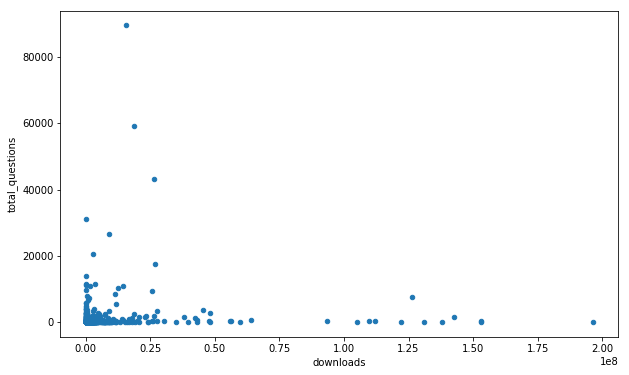

In [22]:
qpd_df.plot.scatter('downloads', 'total_questions')

There isn't an obvious trend, but we see that our query has grabbed some of those outliers with many questions and relatively few downloads.